In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin, cos
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.1'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'
%matplotlib notebook

In [2]:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
u, v = np.meshgrid(u, v)

x = np.ravel(np.sin(v) * np.cos(u))
y = np.ravel(np.sin(v) * np.sin(u))
z = np.ravel(np.cos(v)) 

circle_coords = np.c_[x, y, z]

<IPython.core.display.Javascript object>


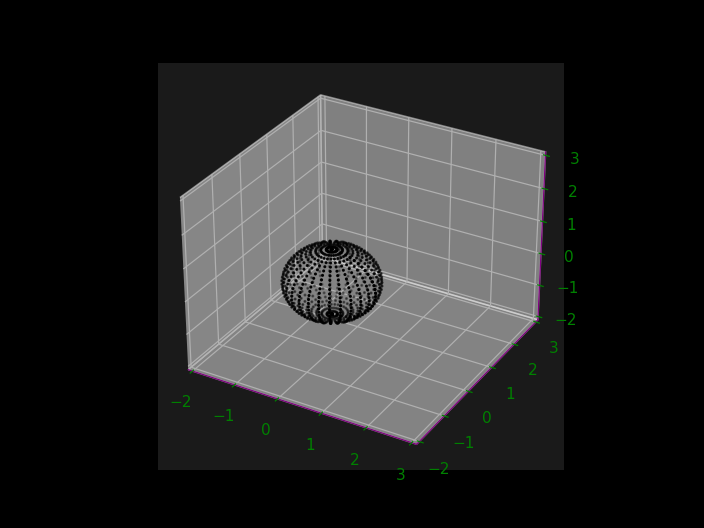

(-2.0, 3.0)

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(circle_coords[:, 0],
           circle_coords[:, 1],
           circle_coords[:, 2], s=1, c='black')

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_zlim(-2, 3)

In [4]:
def scale_object_coords(coords, scale_factor):
    _4d_coords = np.c_[circle_coords, np.ones(circle_coords.shape[0])]
    s = scale_factor
    scaleM = np.array([[s, 0, 0, 0],
                       [0, s, 0, 0],
                       [0, 0, s, 0],
                       [0, 0, 0, 1]])
    return (scaleM @ _4d_coords.T).T[:, :3]

In [5]:
scaled_circle_coords = scale_object_coords(circle_coords, 2)

<IPython.core.display.Javascript object>


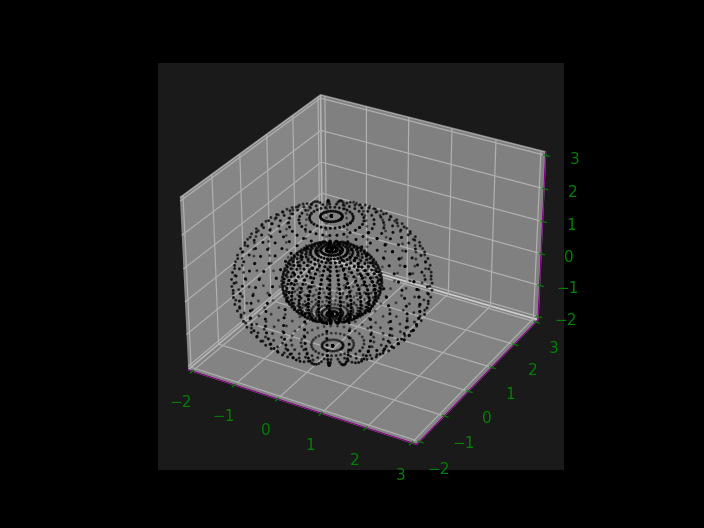

(-2.0, 3.0)

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_circle_coords[:, 0],
           scaled_circle_coords[:, 1],
           scaled_circle_coords[:, 2], s=1, c='black')

ax.scatter(circle_coords[:, 0],
           circle_coords[:, 1],
           circle_coords[:, 2], s=1, c='black')

ax.set_xlim(-2, 3)
ax.set_ylim(-2, 3)
ax.set_zlim(-2, 3)

In [26]:
def transform_coords(coords,
                     scale_factor=1,
                     rotate_angles=(0, 0, 0),
                     translate_coords=(0, 0, 0),
                     model_center=(0, 0, 0)):
    
    _4d_coords = np.c_[coords, np.ones(coords.shape[0])].copy()
    s = scale_factor
    tx, ty, tz = translate_coords
    a_x, a_y, a_z = rotate_angles
    cx, cy, cz = model_center

    translate_to_origin = np.array([[1, 0, 0, -cx],
                                    [0, 1, 0, -cy],
                                    [0, 0, 1, -cz],
                                    [0, 0, 0, 1]])

    
    rotate_X = np.array([[1, 0, 0, 0],
                         [0, cos(a_x),-sin(a_x), 0],
                         [0, sin(a_x), cos(a_x), 0],
                         [0, 0, 0, 1]])
    
    rotate_Y = np.array([[cos(a_y), 0, sin(a_y), 0],
                         [0, 1, 0, 0],
                         [-sin(a_y), 0, cos(a_y), 0],
                         [0, 0, 0, 1]])
    
    rotate_Z = np.array([[cos(a_z),-sin(a_z), 0, 0],
                         [sin(a_z), cos(a_z), 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])
    
    
    scaleM = np.array([[s, 0, 0, 0],
                       [0, s, 0, 0],
                       [0, 0, s, 0],
                       [0, 0, 0, 1]])
    
    translateM = np.array([[1, 0, 0, tx],
                           [0, 1, 0, ty],
                           [0, 0, 1, tz],
                           [0, 0, 0, 1]])
    
    translate_back = np.array([[1, 0, 0, cx],
                               [0, 1, 0, cy],
                               [0, 0, 1, cz],
                               [0, 0, 0, 1]])
    
    
    rotate_XYZ = rotate_X @ rotate_Y @ rotate_Z 
    
    transformationM = translate_back @ translateM @ rotate_XYZ @ scaleM @ translate_to_origin
    
    return (transformationM @ _4d_coords.T).T[:, :3]

In [27]:
transformed_circle_coords = transform_coords(circle_coords,
                                             translate_coords=(1, 1, 1))

transformed_circle_coords2 = transform_coords(transformed_circle_coords,
                                              rotate_angles=(1, 0, 0),
                                              model_center=(1, 1, 1))

In [28]:
def show_vectors(vectors, xyz_lim=5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], s=1, c='black')
    ax.set_xlim(-xyz_lim, xyz_lim)
    ax.set_ylim(-xyz_lim, xyz_lim)
    ax.set_zlim(-xyz_lim, xyz_lim)

<IPython.core.display.Javascript object>


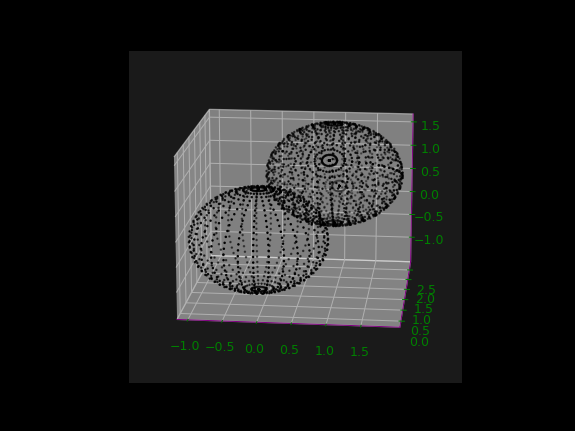

In [29]:
show_vectors(np.r_[circle_coords, transformed_circle_coords, transformed_circle_coords2], xyz_lim=3)

In [11]:
all_coords = np.r_[circle_coords, transformed_circle_coords, transformed_circle_coords2]
all_coords_transf = transform_coords(all_coords, rotate_angles=(2,1,2), translate_coords=(2, 2, 2))

<IPython.core.display.Javascript object>


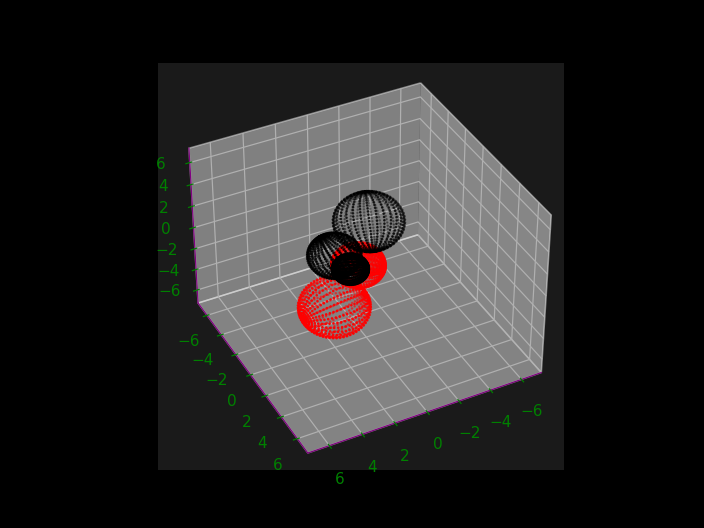

In [12]:
xyz_lim = 7

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(all_coords[:, 0], all_coords[:, 1], all_coords[:, 2], s=.5, c='red')
ax.scatter(all_coords_transf[:, 0], all_coords_transf[:, 1], all_coords_transf[:, 2], s=.5, c='black')

ax.set_xlim(-xyz_lim, xyz_lim)
ax.set_ylim(-xyz_lim, xyz_lim)
ax.set_zlim(-xyz_lim, xyz_lim);

In [13]:
# def transform_coordinate_system(coords, 
#                                 scaling=1,
#                                 rotate_angles=(0,0,0),
#                                 translate_coords=(0,0,0)):
    
#     _4d_coords = np.c_[coords, np.ones(coords.shape[0])].copy()
#     s = 1/scaling
#     tx, ty, tz = translate_coords
#     tx, ty, tz = -tx, -ty, -tz    
#     a_x, a_y, a_z = rotate_angles
#     a_x, a_y, a_z = -a_x, -a_y, -a_z

#     rotate_X = np.array([[1, 0, 0, 0],
#                          [0, cos(a_x),-sin(a_x), 0],
#                          [0, sin(a_x), cos(a_x), 0],
#                          [0, 0, 0, 1]])
    
#     rotate_Y = np.array([[cos(a_y), 0, sin(a_y), 0],
#                          [0, 1, 0, 0],
#                          [-sin(a_y), 0, cos(a_y), 0],
#                          [0, 0, 0, 1]])
    
#     rotate_Z = np.array([[cos(a_z),-sin(a_z), 0, 0],
#                          [sin(a_z), cos(a_z), 0, 0],
#                          [0, 0, 1, 0],
#                          [0, 0, 0, 1]])
    
#     scaleM = np.array([[s, 0, 0, 0],
#                        [0, s, 0, 0],
#                        [0, 0, s, 0],
#                        [0, 0, 0, 1]])
    
#     translateM = np.array([[1, 0, 0, tx],
#                            [0, 1, 0, ty],
#                            [0, 0, 1, tz],
#                            [0, 0, 0, 1]])
    
#     rotate_XYZ = rotate_X @ rotate_Y @ rotate_Z 
    
#     transformationM = scaleM @ translateM @ rotate_XYZ 
    
#     return (transformationM @ _4d_coords.T).T[:, :3]

In [14]:
# more_coords = np.r_[all_coords, all_coords_transf]

# same_coords_other_system = transform_coordinate_system(more_coords,
#                                                        scaling=2, 
#                                                        translate_coords=(3, 5, 2),
#                                                        rotate_angles=(0, 0 , 0))

# same_coords_other_system3 = transform_coordinate_system(more_coords,
#                                                         scaling=2, 
#                                                         translate_coords=(3, 5, 2),
#                                                         rotate_angles=(np.pi, 0 , 0))

In [15]:
# xyz_lim = 5

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(more_coords[:, 0],
#            more_coords[:, 1],
#            more_coords[:, 2], s=.5, c='black')

# ax.scatter(same_coords_other_system[:, 0],
#            same_coords_other_system[:, 1],
#            same_coords_other_system[:, 2], s=10, c='green')

# ax.scatter(same_coords_other_system3[:, 0],
#            same_coords_other_system3[:, 1],
#            same_coords_other_system3[:, 2], s=.5, c='red')

# ax.set_xlim(-xyz_lim, xyz_lim)
# ax.set_ylim(-xyz_lim, xyz_lim)
# ax.set_zlim(-xyz_lim, xyz_lim);